In [17]:
!pip install seaborn
!pip install scipy
!pip install plotly

In [40]:
!pip install pandas

In [1]:
import pandas as pd

In [220]:
df=pd.read_csv("expanded_csv/new_car_details.csv")
df

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\825319738.py:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("expanded_csv/new_car_details.csv")


,it,ft,bt,km,transmission,ownerNo,owner,oem,model,modelYear,...,Top Speed,Acceleration,Tyre Type,No Door Numbers,Cargo Volumn,Wheel Size,Alloy Wheel Size,Ground Clearance Unladen,car_links,City
0,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,2015,...,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,235-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
1,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,2018,...,NaN,NaN,"Tubeless,Radial",4.0,352-litres,16,16,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
2,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,2018,...,150 kmph,14.3 Seconds,Tubeless,5.0,242-litres,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
3,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,2014,...,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,407-litres,14,14,NaN,https://www.cardekho.com/buy-used-car-details/...,Bangalore
4,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,2015,...,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,353-litres,16,16,NaN,https://www.cardekho.com/used-car-details/used...,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,2022,...,NaN,NaN,"Tubeless, Radial",5.0,313,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8365,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,2014,...,140 kmph,19 Seconds,Tubeless Tyres,5.0,177-litres,NaN,NaN,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8366,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,2011,...,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,475-litres,17,17,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata
8367,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,2012,...,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,236-liters,14,14,NaN,https://www.cardekho.com/used-car-details/used...,Kolkata


In [221]:
df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'imgUrl', 'heading', 'desc', 'Registration Year', 'Insurance Validity',
       'Fuel Type', 'Seats', 'Kms Driven', 'RTO', 'Ownership',
       'Engine Displacement', 'Transmission', 'Year of Manufacture',
       'Features', 'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Seats.1', 'Color',
       'Engine Type', 'Displacement', 'Max Torque', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Seating Capacity', 'Steering Type', 'Turning Radi

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 77 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   it                        8369 non-null   int64  
 1   ft                        8369 non-null   object 
 2   bt                        8365 non-null   object 
 3   km                        8369 non-null   object 
 4   transmission              8369 non-null   object 
 5   ownerNo                   8369 non-null   int64  
 6   owner                     8369 non-null   object 
 7   oem                       8369 non-null   object 
 8   model                     8369 non-null   object 
 9   modelYear                 8369 non-null   int64  
 10  centralVariantId          8369 non-null   int64  
 11  variantName               8369 non-null   object 
 12  price                     8369 non-null   object 
 13  priceActual               1670 non-null   object 
 14  priceSav

In [150]:


#km and kmsdriven contains same column so we can drop one column
df.drop(["Kms Driven"],axis=1,inplace=True)

#modelyear and registrationyear and yearof manufacture have same values so we can drop any two col which is registrationyear cz that has missing value
df.drop(["Registration Year"],axis=1,inplace=True)
df.drop(["Year of Manufacture"],axis=1,inplace=True)

#ownerNo, owner, ownership these column contain same value so we can keep any one of the column
df.drop(["owner","Ownership"],axis=1,inplace=True)

#comfort,interior,exterior,safety these columns has string value we converted topfeature so we can drop these column cz it is not important for feature training
df.drop(["Comfort & Convenience","Interior","Exterior","Safety"],axis=1,inplace=True)

#seats and seats.1 and seating capacity has same value so we can drop any two column
df.drop("Seats.1",axis=1,inplace=True)
df.drop("Seating Capacity",axis=1,inplace=True)

# Torque,MaxTorque has same values for we can drop one col
df.drop(["Max Torque"],axis=1,inplace=True)

#Engine and EngineDisplacement and Displacement has same value so we can drop any 2 col
df.drop("Engine Displacement",axis=1,inplace=True)
df.drop("Displacement",axis=1,inplace=True)

#transmission and Transmission has same values so we can drop any one col
df.drop("Transmission",axis=1,inplace=True)

#fueltype and ft has same value so we can drop one col
df.drop("ft",axis=1,inplace=True)

#it column has only one value which 0 it wobt make any change in model building so we can drop it
df.drop("it",axis=1,inplace=True)

In [151]:
df.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear',
       'centralVariantId', 'variantName', 'price', 'priceActual',
       'priceSaving', 'priceFixedText', 'trendingText', 'imgUrl', 'heading',
       'desc', 'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'Engine Type',
       'No of Cylinder', 'Values per Cylinder', 'Value Configuration',
       'Fuel Suppy System', 'BoreX Stroke', 'Compression Ratio',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'No Door Numbers', 'Cargo Volumn',
       'Wheel Size', 'Alloy Wheel Size', 'Ground Clearance Unladen',
       'car_links', 'City'],
      dtype='object')

In [152]:
#Both wheel size and Alloy Wheel Size have same value
df.drop("Alloy Wheel Size",axis=1,inplace=True)

In [153]:
#here we are removing trendingText,imgUrl,heading
df.drop(["trendingText","imgUrl","heading"],axis=1,inplace=True)

In [154]:
#7800+ null values are there. so not useful in building machine learning
df.drop('Ground Clearance Unladen',axis=1,inplace=True)

In [155]:

df.drop('car_links',axis=1,inplace=True)

In [156]:
#we dont need this column for ML because it has on desc about car
df.drop('desc',axis=1,inplace=True)

In [157]:
#this columns mostly has nan values so we can drop
df.drop('priceActual',axis=1,inplace=True)
df.drop('priceSaving',axis=1,inplace=True)
df.drop('priceFixedText',axis=1,inplace=True)

In [158]:
df.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear',
       'centralVariantId', 'variantName', 'price', 'Insurance Validity',
       'Fuel Type', 'Seats', 'RTO', 'Features', 'Mileage', 'Engine',
       'Max Power', 'Torque', 'Color', 'Engine Type', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'BoreX Stroke', 'Compression Ratio', 'Turbo Charger', 'Super Charger',
       'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'Wheel Size', 'City'],
      dtype='object')

In [159]:
df.shape

(8369, 50)

In [160]:
df.isna().sum()

bt                        4
km                        0
transmission              0
ownerNo                   0
oem                       0
model                     0
modelYear                 0
centralVariantId          0
variantName               0
price                     0
Insurance Validity        4
Fuel Type                 0
Seats                     6
RTO                     894
Features                  0
Mileage                 287
Engine                    4
Max Power                60
Torque                   60
Color                     3
Engine Type             295
No of Cylinder           31
Values per Cylinder      51
Value Configuration    2216
Fuel Suppy System      1727
BoreX Stroke           5964
Compression Ratio      6474
Turbo Charger          1040
Super Charger          1962
Length                   79
Width                    83
Height                   79
Wheel Base              163
Front Tread            3558
Rear Tread             3570
Kerb Weight         

In [161]:
#Wheel Size and Value Configuration this columns has more values are null so removing it
df.drop(["Wheel Size","Value Configuration"],axis=1,inplace=True)

In [162]:
df.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'model', 'modelYear',
       'centralVariantId', 'variantName', 'price', 'Insurance Validity',
       'Fuel Type', 'Seats', 'RTO', 'Features', 'Mileage', 'Engine',
       'Max Power', 'Torque', 'Color', 'Engine Type', 'No of Cylinder',
       'Values per Cylinder', 'Fuel Suppy System', 'BoreX Stroke',
       'Compression Ratio', 'Turbo Charger', 'Super Charger', 'Length',
       'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread',
       'Kerb Weight', 'Gross Weight', 'Gear Box', 'Drive Type',
       'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'City'],
      dtype='object')

In [163]:
for i in df.columns:
  if (df[i].isnull().sum()) !=0:
    print(i, df[i].isnull().sum())

bt 4
Insurance Validity 4
Seats 6
RTO 894
Mileage 287
Engine 4
Max Power 60
Torque 60
Color 3
Engine Type 295
No of Cylinder 31
Values per Cylinder 51
Fuel Suppy System 1727
BoreX Stroke 5964
Compression Ratio 6474
Turbo Charger 1040
Super Charger 1962
Length 79
Width 83
Height 79
Wheel Base 163
Front Tread 3558
Rear Tread 3570
Kerb Weight 59
Gross Weight 4541
Gear Box 106
Drive Type 1560
Steering Type 255
Turning Radius 1600
Front Brake Type 96
Rear Brake Type 96
Top Speed 3762
Acceleration 3512
Tyre Type 77
No Door Numbers 11
Cargo Volumn 1593


In [164]:
df.drop(["Super Charger","Fuel Suppy System","Turning Radius","Drive Type","Cargo Volumn"],axis=1,inplace=True) #more missing values
# so we are removing it

In [165]:
for i in df.columns:
  if (df[i].isnull().sum()) !=0:
    print(i, df[i].isnull().sum())

bt 4
Insurance Validity 4
Seats 6
RTO 894
Mileage 287
Engine 4
Max Power 60
Torque 60
Color 3
Engine Type 295
No of Cylinder 31
Values per Cylinder 51
BoreX Stroke 5964
Compression Ratio 6474
Turbo Charger 1040
Length 79
Width 83
Height 79
Wheel Base 163
Front Tread 3558
Rear Tread 3570
Kerb Weight 59
Gross Weight 4541
Gear Box 106
Steering Type 255
Front Brake Type 96
Rear Brake Type 96
Top Speed 3762
Acceleration 3512
Tyre Type 77
No Door Numbers 11


In [166]:
df["Turbo Charger"] =df["Turbo Charger"].replace({'No':'No',"Yes":"Yes",'Twin':'Twin','YES':'Yes','NO':'No','no':'No','twin':'Twin','yes':'Yes','Turbo':'Yes'})

In [167]:
df["Turbo Charger"].value_counts()

Turbo Charger
No      4260
Yes     3016
Twin      53
Name: count, dtype: int64

In [168]:
df["Turbo Charger"].fillna(df["Turbo Charger"].mode()[0],inplace=True) #replacing the null value with mode

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\3099563728.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Turbo Charger"].fillna(df["Turbo Charger"].mode()[0],inplace=True) #replacing the null value with mode


In [169]:
#RTO column it is categorical value
#so for RTO column null values we can fill with unknown
df["RTO"].fillna("Unknown",inplace =True)

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\2727682216.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["RTO"].fillna("Unknown",inplace =True)


In [170]:
#for 8000 data there are 500 categories which makes this too feeble for machine learning to learn about each.
df.drop("Engine Type",axis=1,inplace=True)

In [171]:
df.dropna(subset="Mileage",inplace=True) #Mileage is very important factor in price fixing (domain knowledge) so I tried not altering and dropping the null values instead

In [172]:
#here we are filling steering type with mode values because it is contionous column and changing starting letter to captial
def steer(steer_type):
    if pd.isna(steer_type):
        return steer_type
    steer_type_lower = steer_type.lower()
    
    if 'electronic' in steer_type_lower or 'electric' in steer_type_lower or 'electrical' in steer_type_lower:
        return 'Electronic'
    elif 'epas' in steer_type_lower:
        return 'EPAS'
    elif 'power' in steer_type_lower:
        return 'Power'
    elif 'manual' in steer_type_lower:
        return 'Manual'
    else:
        return 'Other'

df['Steering Type'] = df['Steering Type'].apply(steer)

df['Steering Type'].value_counts()
df["Steering Type"].fillna(df["Steering Type"].mode()[0],inplace=True)
# full_expanded['Steering Type'] = full_expanded['Steering Type'].fillna('Power')
df['Steering Type'].isnull().sum()

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\1094656743.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Steering Type"].fillna(df["Steering Type"].mode()[0],inplace=True)


np.int64(0)

In [173]:
#here also applying same mode value
df["Wheel Base"].isnull().sum()
df["Wheel Base"].fillna(df["Wheel Base"].mode()[0],inplace=True)

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\4042878578.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Wheel Base"].fillna(df["Wheel Base"].mode()[0],inplace=True)


In [174]:
#we already have oem col and varient names and kerbwright doest affect our model building
df.drop(["model",'centralVariantId', 'variantName', 'Kerb Weight'],axis = 1,inplace=True)

In [175]:
#here we are checking value has been reduced or not 
for i in df.columns:
  if (df[i].isnull().sum()) !=0:
    print(i,df[i].dtype, df[i].isnull().sum())

bt object 3
Insurance Validity object 4
Seats object 5
Engine object 1
Max Power object 38
Torque object 38
No of Cylinder float64 1
Values per Cylinder float64 22
BoreX Stroke object 5700
Compression Ratio object 6218
Length object 56
Width object 60
Height object 56
Front Tread object 3337
Rear Tread object 3349
Gross Weight object 4329
Gear Box object 62
Front Brake Type object 65
Rear Brake Type object 65
Top Speed object 3545
Acceleration object 3297
Tyre Type object 56
No Door Numbers float64 7


In [176]:
for i in df.columns: #filling all the missing value with modes.
  if (df[i].isnull().sum()) !=0:
    df[i].fillna(df[i].mode()[0],inplace =True)

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\2196253138.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace =True)


In [177]:
df

,bt,km,transmission,ownerNo,oem,modelYear,price,Insurance Validity,Fuel Type,Seats,...,Gross Weight,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,No Door Numbers,City
0,Hatchback,"1,20,000",Manual,3,Maruti,2015,₹ 4 Lakh,Third Party insurance,Petrol,5 Seats,...,1250kg,5 Speed,Power,Ventilated Disc,Drum,150 Kmph,15.05 Seconds,"Tubeless, Radial",5.0,Bangalore
1,SUV,"32,706",Manual,2,Ford,2018,₹ 8.11 Lakh,Comprehensive,Petrol,5 Seats,...,1660Kg,5 Speed,Power,Ventilated Disc,Drum,165 Kmph,10 Seconds,"Tubeless,Radial",4.0,Bangalore
2,Hatchback,"11,949",Manual,1,Tata,2018,₹ 5.85 Lakh,Comprehensive,Petrol,5 Seats,...,1340kg,5 Speed,Power,Disc,Drum,150 kmph,14.3 Seconds,Tubeless,5.0,Bangalore
3,Sedan,"17,794",Manual,1,Hyundai,2014,₹ 4.62 Lakh,Comprehensive,Petrol,5 Seats,...,1340kg,5 Speed,Power,Disc,Drum,172km/hr,14.2 Seconds,"Tubeless,Radial",4.0,Bangalore
4,SUV,"60,000",Manual,1,Maruti,2015,₹ 7.90 Lakh,Third Party insurance,Diesel,5 Seats,...,1670kg,5 Speed,Power,Ventilated Disc,Solid Disc,190 Kmph,12 Seconds,"Tubeless,Radial",5.0,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Hatchback,"10,000",Manual,1,Maruti,2022,₹ 5.10 Lakh,Third Party insurance,Petrol,5 Seats,...,1260,5-Speed,Electronic,Ventilated Disc,Drum,165 Kmph,10 Seconds,"Tubeless, Radial",5.0,Kolkata
8365,Hatchback,"1,20,000",Manual,1,Maruti,2014,₹ 1.80 Lakh,Third Party insurance,Petrol,5 Seats,...,1185kg,5 Speed,Power,Solid Disc,Drum,140 kmph,19 Seconds,Tubeless Tyres,5.0,Kolkata
8366,Sedan,"50,000",Automatic,3,Mercedes-Benz,2011,₹ 5.50 Lakh,Third Party insurance,Petrol,5 Seats,...,2020kg,7 Speed,Power,Ventilated Disc,Solid Disc,230km/hr,8.8 Seconds,"Tubeless,Radial",4.0,Kolkata
8367,Hatchback,"40,000",Manual,1,Maruti,2012,₹ 1.40 Lakh,Third Party insurance,Petrol,5 Seats,...,1430kg,5 Speed,Power,Ventilated Disc,Drum,156 Kmph,15 Seconds,"Tubeless,Radial",5.0,Kolkata


In [178]:
df.shape

(8082, 38)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8082 entries, 0 to 8368
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bt                   8082 non-null   object 
 1   km                   8082 non-null   object 
 2   transmission         8082 non-null   object 
 3   ownerNo              8082 non-null   int64  
 4   oem                  8082 non-null   object 
 5   modelYear            8082 non-null   int64  
 6   price                8082 non-null   object 
 7   Insurance Validity   8082 non-null   object 
 8   Fuel Type            8082 non-null   object 
 9   Seats                8082 non-null   object 
 10  RTO                  8082 non-null   object 
 11  Features             8082 non-null   int64  
 12  Mileage              8082 non-null   object 
 13  Engine               8082 non-null   object 
 14  Max Power            8082 non-null   object 
 15  Torque               8082 non-null   object

In [180]:
#here we are removing comma from km column
df["km"] = df["km"].apply(lambda i: int(i.replace(",","")))
df["km"].dtype

dtype('int64')

In [35]:
df["km"]

0       120000
1        32706
2        11949
3        17794
4        60000
         ...  
8364     10000
8365    120000
8366     50000
8367     40000
8368    120000
Name: km, Length: 8082, dtype: int64

In [181]:
import re
def convert_amount(amount):
    # Remove '₹' and whitespace
    amount = amount.replace('₹ ', '')
    
    # Handle Crore
    if 'Crore' in amount:
        value = float(re.sub(r'[^\d.]', '', amount))
        return int(value * 10000000)  # Convert crore to integer
    
    # Handle Lakh
    elif 'Lakh' in amount:
        value = float(re.sub(r'[^\d.]', '', amount))
        return int(value * 100000)  # Convert lakh to integer
    
    # Handle plain amount
    else:
        value = int(re.sub(r'[^\d]', '', amount))
        return value

df['price'] = df['price'].apply(convert_amount)
df['price']

0       400000
1       811000
2       585000
3       462000
4       790000
         ...  
8364    509999
8365    180000
8366    550000
8367    140000
8368    500000
Name: price, Length: 8082, dtype: int64

In [182]:
#here we are converting all int value to float
df['price'] = df['price'].astype(float)

In [183]:
def convert_to_float(value):
    if pd.isna(value):  # Check if the value is NaN
        return value
    else:
        value = value.replace("km/kg", "").replace("kmpl", "").replace(" ", "")

    try:
        return float(value)
    except ValueError:
        return value
df['Mileage'] = df['Mileage'].apply(convert_to_float)

In [39]:
df['Mileage']#changing int value to float

0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8082, dtype: float64

In [184]:
#in engine we are removing cc value and replace to empty one and then converting to int
def convert_to_int(value):
    if pd.isna(value):  # Check if the value is NaN
        return value
    else:
        value.replace(" ","")
        return int(value.replace("CC",""))
df["Engine"] =df["Engine"].apply(convert_to_int)
df['Engine'].dtype

dtype('int64')

In [41]:
df['Engine']

0        998
1       1497
2       1199
3       1197
4       1248
        ... 
8364     998
8365     796
8366    1796
8367    1197
8368    1461
Name: Engine, Length: 8082, dtype: int64

In [185]:
df['Max Power'] = df['Max Power'].str.extract(r'(\d+\.?\d*)')

# Convert extracted values to float, coercing any errors to NaN
df['Max Power'] = pd.to_numeric(df['Max Power'], errors='coerce')

In [42]:
df['Max Power']

0        67.04
1       121.31
2        84.00
3        81.86
4        88.50
         ...  
8364     65.71
8365     47.30
8366    186.00
8367     85.80
8368    108.45
Name: Max Power, Length: 8082, dtype: float64

In [186]:
df['Torque'] = df['Torque'].str.extract(r'(\d+\.?\d*)')

# Convert extracted values to float, coercing any errors to NaN
df['Torque'] = pd.to_numeric(df['Torque'], errors='coerce')

In [187]:
df["No of Cylinder"] = df["No of Cylinder"].apply(lambda i: int(i))
df["Values per Cylinder"] = df["Values per Cylinder"].apply(lambda i: int(i))

In [188]:
df["Length"] = df["Length"].apply(lambda i: i.replace(",", "") if isinstance(i, str) else i)#here we are replacing comma value with empty string
df["Length"] = df["Length"].apply(lambda i: i[:4] if isinstance(i, str) else i)
df["Length"] = df["Length"].apply(lambda i: float(i) if isinstance(i, str) else i)
df["Length"].dtype

dtype('float64')

In [189]:
df["Width"] = df["Width"].apply(lambda i: i.replace(",", "") if isinstance(i, str) else i)#here we are replacing comma value with empty string
df["Width"] = df["Width"].apply(lambda i: float(i[:4]) if isinstance(i, str) else i)

In [190]:
df["Height"] = df["Height"].apply(lambda i: i.replace(",", "") if isinstance(i, str) else i)#here we are replacing comma value with empty string
df["Height"] = df["Height"].apply(lambda i: float(i[:4]) if isinstance(i, str) else i)

In [191]:
df["Wheel Base"] = df["Wheel Base"].apply(lambda i: i.replace(",", "") if isinstance(i, str) else i)#here we are replacing comma value with empty string
df["Wheel Base"] = df["Wheel Base"].apply(lambda i: float(i[:4]) if isinstance(i, str) else i)

In [192]:
df["No Door Numbers"] =df["No Door Numbers"].apply(lambda i: int(i))

In [193]:
df.drop(["BoreX Stroke","Compression Ratio",'Front Tread', 'Rear Tread', 'Gross Weight','Top Speed','Acceleration'],axis=1,inplace=True)

In [194]:
df.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear', 'price',
       'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'No of Cylinder',
       'Values per Cylinder', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'City'],
      dtype='object')

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8082 entries, 0 to 8368
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bt                   8082 non-null   object 
 1   km                   8082 non-null   int64  
 2   transmission         8082 non-null   object 
 3   ownerNo              8082 non-null   int64  
 4   oem                  8082 non-null   object 
 5   modelYear            8082 non-null   int64  
 6   price                8082 non-null   float64
 7   Insurance Validity   8082 non-null   object 
 8   Fuel Type            8082 non-null   object 
 9   Seats                8082 non-null   object 
 10  RTO                  8082 non-null   object 
 11  Features             8082 non-null   int64  
 12  Mileage              8082 non-null   float64
 13  Engine               8082 non-null   int64  
 14  Max Power            8082 non-null   float64
 15  Torque               8082 non-null   float6

In [196]:
df.shape

(8082, 31)

In [197]:
# finding whether objects are categorical or numerical column
for i in df.select_dtypes(include='object').columns:
  print(i)
  print(df[i].unique())
  print("*****"*5)

bt
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Convertibles'
 'Hybrids' 'Wagon' 'Pickup Trucks']
*************************
transmission
['Manual' 'Automatic']
*************************
oem
['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra' 'BMW'
 'Renault' 'Mercedes-Benz' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen' 'Opel'
 'Mahindra Renault' 'Isuzu' 'Lexus' 'Porsche' 'Hindustan Motors']
*************************
Insurance Validity
['Third Party insurance' 'Comprehensive' 'Third Party' 'Zero Dep' '2' '1'
 'Not Available']
*************************
Fuel Type
['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']
*************************
Seats
['5 Seats' '7 Seats' '4 Seats' '6 Seats' '8 Seats' '10 Seats' '9 Seats'
 '2 Seats']
*************************
RTO
['KA51' 'KA05' 'KA03' 'KA53' 'KA04' 'Unknown' 'KA01' 'OD02' 'KA41' 'KA02'
 'HR26' 'WB38' 'KA47' 'KA19' 'KA

In [198]:
#we dont know what that 1 represents and it has only two value counts so we can drop that
df = df[df['Insurance Validity'] != '1']
df = df[df['Insurance Validity'] != '2']
df['Insurance Validity'] = df['Insurance Validity'].replace('Third Party', 'Third Party insurance')
df["Insurance Validity"].value_counts()

Insurance Validity
Third Party insurance    4549
Comprehensive            3017
Zero Dep                  298
Not Available             214
Name: count, dtype: int64

In [199]:
def rto(value):
    if pd.isna(value):  # Check if the value is NaN
        return value
    else:
        return value[:-2].upper()
df["RTO"] = df["RTO"].apply(rto)
df["RTO"].unique()#we are getting unique values

array(['KA', 'UNKNO', 'OD', 'HR', 'WB', 'PY', 'TN', 'MH', 'KL', 'DL',
       'UP', 'AP', 'VK', 'MP', 'GJ', 'RJ', 'CH', 'JH', 'TS', 'HP', 'OR',
       'TM', 'UK', 'PH', 'DD', 'PB', 'AS', 'CG', 'GA', 'TA', 'TT', 'KK',
       'AA', 'TD', '22', 'HE', 'RR', 'RH', 'R1', 'BR', 'AR', 'WW', 'AN'],
      dtype=object)

In [200]:
df['RTO'].value_counts()

RTO
TN       1248
KA       1245
WB       1132
TS       1009
RJ        863
UNKNO     854
DL        678
HR        343
AP        298
UP        244
HP         24
MH         23
UK         13
CH         12
JH         11
MP         10
PB          9
KL          9
GJ          8
PY          6
OD          6
AS          3
DD          3
TA          3
CG          3
RH          2
TT          2
BR          2
TM          1
OR          1
VK          1
PH          1
AA          1
KK          1
GA          1
22          1
TD          1
RR          1
HE          1
R1          1
AR          1
WW          1
AN          1
Name: count, dtype: int64

In [201]:
#22 and R1 occured one time so dropping that
df = df[df["RTO"] != "22"]
df = df[df["RTO"] != "R1"]

In [202]:
# grouping the colours to a maximum level is necessary for the machine to learn efficiently.
df['Color'] = df['Color'].str.lower().str.strip()
# Define a dictionary to map similar colors to a standard color
color_mapping = {
    'white': 'white','platinum white': 'white','platinum white pearl': 'white','taffeta white': 'white','superior white': 'white','pure white': 'white','polar white': 'white',
    'porcelain white': 'white','coral white': 'white','diamond white': 'white','pearl arctic white': 'white','pearl met. arctic white': 'white','super white': 'white',

    'red': 'red','flash red': 'red','fiery red': 'red','prime star gaze': 'red','b red': 'red','cherry red': 'red','fire brick red': 'red','passion red': 'red',

    'gray': 'gray','grey': 'gray','minimal grey': 'gray','urban titanium': 'gray','smoke grey': 'gray','gravity gray': 'gray','titanium grey': 'gray','daytona grey': 'gray',
    'metallic azure grey': 'gray','granite grey': 'gray',

    'blue': 'blue','nexa blue': 'blue','ray blue': 'blue','twilight blue': 'blue','sky blue': 'blue','mediterranean blue': 'blue','glacier white pearl': 'blue',
    'galaxy blue': 'blue','medium blue': 'blue',

    'black' : 'black','aurora black pearl': 'black','phantom black': 'black','caviar black': 'black','starry black': 'black',

    'silver': 'silver','light silver': 'silver','silky silver': 'silver','bright silver': 'silver','metallic premium silver': 'silver','arctic silver': 'silver','sleek silver': 'silver',

    'green': 'green','olive green': 'green',

    'golden': 'gold','gold': 'gold','golden brown': 'brown',

    'beige': 'beige','bold beige metallic': 'beige',

    'brown': 'brown','copper': 'brown','bronze': 'brown','espreso_brwn': 'brown',

    'others': 'others','other': 'others','falsa colour': 'others','metall': 'others','met ecru beige': 'others','champagne mica metallic': 'others','bold beige metallic': 'others',
    'carbon steel': 'others',
    "o purple":"purple","modern steel metallic":"others","beige":"white","star dust":"others",'wine red':'red','t wine':'others', 'tafeta white':'white',
    "p black":"black",'titanium':'others',"chill":"others","burgundy":"others","purple":"purple","lunar silver metallic":"silver",
    'berry red':'red','premium amber metallic':'others','r earth':'others','platinum silver':'silver', 'orchid white pearl':'white', 'carnelian red pearl':'red',
    'alabaster silver metallic':'silver','cavern grey':'gray', 'pearl white':'white','magma grey':'gray',
    'dark red':'red','cherry':'red','hip hop black':'black','cirrus white':'white','arizona blue':'blue',
    'modern steel metal':'others','burgundy red metallic':'red','magma gray':'gray','cbeige':'white','goldan brwoon':'brown','m grey':'gray',
    'urban titanim':'others','g brown':'brown','rosso brunello':'others','a silver':'silver','b grey':'gray', 'radiant red m':'red','c bronze':'others','metallic magma grey':'gray',
    'c brown':'brown','metallic glistening grey':'gray','urban titanium metallic':'others','violet':'purple','tafeta white':'white','carnelian red pearl':'red','brick red':'red',
    'mist silver':'silver','candy white':'white','glistening grey':'gray','deep black pearl':'black',
    'metallic silky silver':'silver', 'stardust':'others','alabaster silver metallic - amaze':'silver', 'outback bronze':'others','solid fire red':'red', 'moonlight silver':'silver',
    'cashmere':'others','pearl snow white':'white','light orange':'orange','foliage':'others', 'off white':'white','parpel':'others','sunset red':'red',
    'silicon silver':'silver','dark blue':'blue','technometgrn+gryroof':'others','out back bronze':'others','symphony silver':'silver'


}

# Apply the mapping to the color column
df['Color'] = df['Color'].replace(color_mapping)

df["Color"].unique()

array(['white', 'red', 'others', 'gray', 'maroon', 'orange', 'silver',
       'blue', 'brown', 'yellow', 'black', 'gold', 'green', 'purple'],
      dtype=object)

In [203]:
df['Gear Box'].value_counts()

Gear Box
5 Speed             4507
6 Speed             1018
5-Speed              524
7 Speed              257
8 Speed              215
                    ... 
7 Speed S tronic       1
5 speed manual         1
7-Speed S tronic       1
9-Speed                1
eCVT                   1
Name: count, Length: 97, dtype: int64

In [204]:
# 96 values can be grouped under several values and removing extra unwanted strings
gearbox_mapping = {
    '5 Speed ':5, '5 Speed':5, '6 Speed':6, '7-Speed':7, '4 Speed':4, '6 Speed ':6,

       '8G-DCT':0, '5-Speed':5, '7 Speed':7, '9 Speed':9, '8 Speed':8,

       '8-Speed Steptronic':8, '6-Speed':6, '7-Speed DCT':7, '9-Speed':9,

       '8 Speed Tiptronic':8, '5':5, '6 Speed IMT':6, '6-speed AutoSHIFT':6,

       '6-speed CVT':6, 'CVT':0, '6-speed':6, '7-speed DCT':7, '7 Speed DSG':7,

       '7 Speed DCT':7, '6':6, '8-Speed':8, '5-speed':5, '6 speed ':6,

       '8-Speed Steptronic Sport Automatic Transmission':8, '5 speed':5,

       '7 Speed CVT':7, 'Five Speed Manual':5, '5 Speed CVT':5,

       '6 Speed AT':6, '6-Speed iMT':6, '6-Speed DCT':6, '7-Speed S-Tronic ':7,

       '7G DCT 7-Speed Dual Clutch Transmission ':7, '7-Speed S-Tronic':7,

       '5-Speed`':5, '9 speed Tronic':9, '6-Speed IVT':6, 'Direct Drive':0,

       '6 Speed IVT':6, 'IVT':0, '8 Speed CVT':8,

       'Five Speed Manual Transmission':5, '5 Speed AT+ Paddle Shifters':5,

       '8-Speed ':8, 'iMT':0, 'AGS':0, '6Speed':6, '4-Speed':4, '6-Speed IMT':6,

       '6 Speed MT':6, '6 Speed iMT':6, '7 Speed ':7, 'Five Speed':5, '4 Speed ':4,

       '7-speed':7, '6-Speed AT':6, '9G-TRONIC':0, '9G-TRONIC automatic':0,

       '7-Speed DSG':7, 'Six Speed Manual':6, '8 Speed Sport':8,

       '6 Speed with Sequential Shift':6, '6-speed IVT':6,

       '7-Speed Steptronic':7, '8':8, '8-speed':8,

       'Five Speed Manual Transmission Gearbox':5, 'AMG SPEEDSHIFT DCT 8G':0,

       'AMG 7-SPEED DCT':7, 'E-CVT':0, '8 Speed ':8, '7-speed Stronic':7,

       '8 speed':8, '8-Speed Automatic Transmission':8,

       'Six Speed Manual with Paddle Shifter':6, '7 Speed Steptronic Sport':7,

       '4-speed':4, '6-speed DCT':6, '9-speed automatic':9, 'SPEEDSHIFT TCT 9G':0,

       '7 Speed 7G-DCT':7, '7-speed PDK':7, '8Speed':8,

       '8-speed Steptronic Automatic':8, '10-speed Automatic':10,

       'Six Speed Automatic Transmission':6, '9G TRONIC':0, '5-Speed ':5,


       '7-Speed DCT Steptronic':7, '8-Speed DCT':8,

       'Mercedes Benz 7 Speed Automatic':7, '10 speed':10, '6-speed iMT':6,

       '7 speed':7, '6 speed automatic':6, '7G-DCT':0,

       'Six Speed Geartronic, Six Speed Automati':6,

       '5 Speed Manual (Cable Type Gear Shift)':5,

       'Six Speed Automatic Gearbox':6, '10 Speed':10, 'Fully Automatic':0,

       'Single-speed transmission':0, 'Six Speed  Gearbox':6,

       '5 Speed Forward, 1 Reverse':5, '7 Speed S tronic':7,

       'Single speed reduction gear':0, 'Single Speed':0, '5 speed manual':5,

       '9 -speed':9, '8-speed tiptronic':8, '7-Speed S tronic':7, 'eCVT':0
}

df["Gear Box"] = df["Gear Box"].replace(gearbox_mapping)
df["Gear Box"].unique()

C:\Users\Jacquline\AppData\Local\Temp\ipykernel_15296\2319989765.py:79: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gear Box"] = df["Gear Box"].replace(gearbox_mapping)


array([ 5,  6,  7,  4,  9,  8,  0, 10])

In [205]:
df["Gear Box"]

0       5
1       5
2       5
3       5
4       5
       ..
8364    5
8365    5
8366    7
8367    5
8368    6
Name: Gear Box, Length: 8076, dtype: int64

In [206]:
#here we are grouping and converting into one word and checking spelling of words
brake_type_mapping = {
    'ventilated disc': 'Ventilated Disc','ventilated discs': 'Ventilated Disc','ventilated disk': 'Ventilated Disc','ventilated disc': 'Ventilated Disc',
    'booster assisted ventilated disc': 'Ventilated Disc','caliper ventilated disc': 'Ventilated Disc',  'disc,internally ventilated': 'Ventilated Disc',
    'vantilated disc': 'Ventilated Disc',  'ventillated disc': 'Ventilated Disc',  'ventilated Disc':'Ventilated Disc',
   'Ventilated Discs':'Ventilated Disc','Ventilated Disc ':'Ventilated Disc', 'Ventilated DIsc':'Ventilated Disc','Booster assisted ventilated disc':'Ventilated Disc',
    'Ventilated Disk':'Ventilated Disc','Vantilated Disc':'Ventilated Disc','Ventlated Disc':'Ventilated Disc','Caliper Ventilated Disc':'Ventilated Disc',
    'Disc,internally ventilated ' :'Ventilated Disc','Ventillated Disc':'Ventilated Disc','ventilated disc':'Ventilated Disc','Ventilated disc':'Ventilated Disc',

    'disc': 'Disc','disc & caliper type': 'Disc','multilateral disc': 'Disc','disc brakes': 'Disc','solid disc': 'Disc', 'disc, 236 mm': 'Disc',
    'Disc ':'Disc', ' Disc':'Disc','disk': 'Disc',  'discs': 'Disc', 'Disk':'Disc', 'Discs':'Disc','Disc brakes':'Disc', 'Disc & Caliper Type':'Disc',
      # Also covers variations
    'electric parking brake': 'Others',

    'abs': 'Others','mechanical-hydraulic dual circuit': 'Others','ABS':'others',
    'vacuum assisted hydraulic dual circuit w': 'Others','Mechanical-hydraulic dual circuit':'others',
    'tandem master cylinder with servo assist': 'Others','Tandem master cylinder with Servo assist':'others',

    'drum': 'Drum','ventlated disc':'Ventilated Disc'
      # Similar to 'disc'

}
df['Front Brake Type'] = df['Front Brake Type'].replace(brake_type_mapping)
df["Front Brake Type"].unique()

array(['Ventilated Disc', 'Disc', 'Ventilated discs', 'Disc, 236 mm',
       'Multilateral Disc', 'Solid Disc', 'Drum',
       'Electric Parking Brake', ' Ventilated Disc', 'others',
       'Vacuum assisted hydraulic dual circuit w'], dtype=object)

In [207]:
df['Front Brake Type'] =df['Front Brake Type'].replace({'Ventilated discs':'Disc','Disc, 236 mm':'Disc','Multilateral Disc':'Disc', 'Solid Disc':'Disc',
                                                    'Electric Parking Brake':'others','Ventilated Disc':'Disc',' Ventilated Disc':'Disc','Vacuum assisted hydraulic dual circuit w':'others'})

In [208]:
#here we are grouping and converting into one word and also checking value count
def categorize_brake_type(brake_type):
    if pd.isna(brake_type):
        return brake_type
    brake_type_lower = brake_type.lower()
    
    if 'disc' in brake_type_lower or 'disk' in brake_type_lower:
        return 'Disc'
    elif 'drum' in brake_type_lower:
        return 'Drum'
    elif 'hydraulic' in brake_type_lower or 'mechanical' in brake_type_lower:
        return 'Hydraulics'
    elif 'electric' in brake_type_lower or 'parking' in brake_type_lower:
        return 'Electric'
    else:
        return 'Other'

df['Rear Brake Type'] = df['Rear Brake Type'].apply(categorize_brake_type)
df['Rear Brake Type'].value_counts()

Rear Brake Type
Drum          6530
Disc          1539
Hydraulics       4
Electric         3
Name: count, dtype: int64

In [66]:
df['Tyre Type'].value_counts()

Tyre Type
Tubeless,Radial               4405
Tubeless, Radial              1272
Tubeless                      1165
Tubeless Tyres                 416
Radial, Tubeless               200
Radial                         132
Radial, Tubless                 82
Tubeless Tyres, Radial          61
Tubeless,Radial                 57
Tubeless Radial Tyres           53
Radial,Tubeless                 47
Tubeless,Radials                32
Tubless, Radial                 29
Tubeless,Runflat                18
Tubeless, Runflat               17
tubeless tyre                   14
Run-Flat                        14
Runflat                         12
Runflat Tyres                   11
Tubeless                         7
Runflat Tyre                     5
Radial                           5
Radial Tubeless                  5
Tubeless Tyres Mud Terrain       3
Tubeless Radials Tyre            3
Tubeless. Runflat                2
Tubeless Tyre                    2
Tubeless Radial                  2
Tubless,Ra

In [209]:
#here we are grouping and converting into one word and also checking value count
def categorize_tyre_type(tyre_type):
    if pd.isna(tyre_type):
        return tyre_type
    tyre_type_lower = tyre_type.lower()
    
    if 'runflat' in tyre_type_lower:
        return 'Runflat'
    elif 'tubeless' in tyre_type_lower or 'tubless' in tyre_type_lower:
        return 'Tubeless'
    elif 'radial' in tyre_type_lower:
        return 'Radial'
    else:
        return 'Other'

df['Tyre Type'] = df['Tyre Type'].apply(categorize_tyre_type)
df['Tyre Type'].value_counts()

Tyre Type
Tubeless    7858
Radial       138
Runflat       66
Other         14
Name: count, dtype: int64

In [210]:
#spelling and word repetition/same meaning check
for i in df.select_dtypes(include='object').columns:
  print(i)
  print(df[i].unique())
  print("*****"*5)

bt
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Convertibles'
 'Hybrids' 'Wagon' 'Pickup Trucks']
*************************
transmission
['Manual' 'Automatic']
*************************
oem
['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra' 'BMW'
 'Renault' 'Mercedes-Benz' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen' 'Opel'
 'Mahindra Renault' 'Isuzu' 'Lexus' 'Porsche' 'Hindustan Motors']
*************************
Insurance Validity
['Third Party insurance' 'Comprehensive' 'Zero Dep' 'Not Available']
*************************
Fuel Type
['Petrol' 'Diesel' 'LPG' 'CNG' 'Electric']
*************************
Seats
['5 Seats' '7 Seats' '4 Seats' '6 Seats' '8 Seats' '10 Seats' '9 Seats'
 '2 Seats']
*************************
RTO
['KA' 'UNKNO' 'OD' 'HR' 'WB' 'PY' 'TN' 'MH' 'KL' 'DL' 'UP' 'AP' 'VK' 'MP'
 'GJ' 'RJ' 'CH' 'JH' 'TS' 'HP' 'OR' 'TM' 'UK' 'PH' 'DD'

In [211]:
df.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear', 'price',
       'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'No of Cylinder',
       'Values per Cylinder', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'City'],
      dtype='object')

In [212]:
#segregating continuous and categorical column
cont = []
cat = []
for i in df.columns:
  if df[i].nunique()>41:
    cont.append(i)
  else:
    cat.append(i)



In [70]:

print(cont)

['km', 'price', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Length', 'Width', 'Height', 'Wheel Base']


In [71]:


print(cat)

['bt', 'transmission', 'ownerNo', 'oem', 'modelYear', 'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features', 'Color', 'No of Cylinder', 'Values per Cylinder', 'Turbo Charger', 'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'City']


In [72]:
df.shape

(8076, 31)

In [213]:
def remove_outliers(df, columns):
    for col in columns:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]
        else:
            print(f"Column '{col}' is not numeric and will be skipped.")
    return df

# Apply outlier removal
df = remove_outliers(df, cont)

print(df.shape)


(4824, 31)


In [240]:
df.to_csv("final.csv")

Machine Learning

In [241]:
import pandas as pd
df=pd.read_csv("final.csv")

In [224]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [225]:
for i in df.select_dtypes(include='object').columns:     #here we are getting object columns
    print(i)

bt
transmission
oem
Insurance Validity
Fuel Type
Seats
RTO
Color
Turbo Charger
Steering Type
Front Brake Type
Rear Brake Type
Tyre Type
City


In [226]:
df['Seats']

0       5 Seats
1       5 Seats
2       5 Seats
3       5 Seats
4       5 Seats
         ...   
4819    5 Seats
4820    5 Seats
4821    5 Seats
4822    5 Seats
4823    5 Seats
Name: Seats, Length: 4824, dtype: object

In [227]:
#encoding
encoders = {}
for column in df.select_dtypes(include='object').columns:
    print(column)
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

bt
transmission
oem
Insurance Validity
Fuel Type
Seats
RTO
Color
Turbo Charger
Steering Type
Front Brake Type
Rear Brake Type
Tyre Type
City


In [228]:
encoders

{'bt': LabelEncoder(),
 'transmission': LabelEncoder(),
 'oem': LabelEncoder(),
 'Insurance Validity': LabelEncoder(),
 'Fuel Type': LabelEncoder(),
 'Seats': LabelEncoder(),
 'RTO': LabelEncoder(),
 'Color': LabelEncoder(),
 'Turbo Charger': LabelEncoder(),
 'Steering Type': LabelEncoder(),
 'Front Brake Type': LabelEncoder(),
 'Rear Brake Type': LabelEncoder(),
 'Tyre Type': LabelEncoder(),
 'City': LabelEncoder()}

In [83]:
encoder = LabelEncoder()

# Fit the encoder on the 'ownerNo' column
encoder.fit(df['ownerNo'])

LabelEncoder()

In [85]:
df.to_csv("encoder.csv")

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

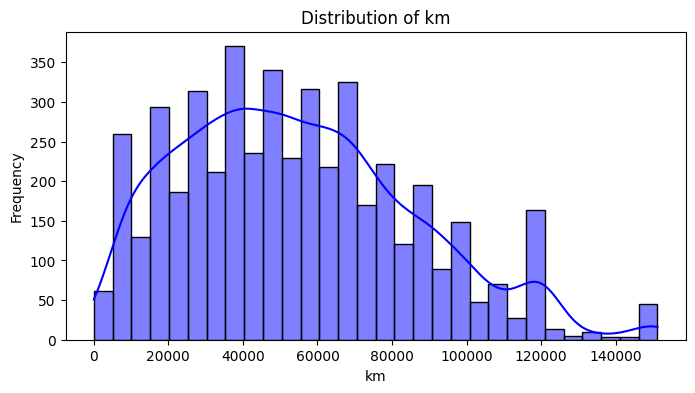

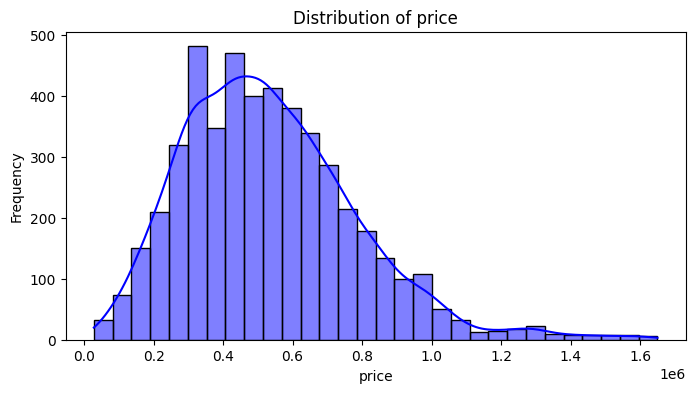

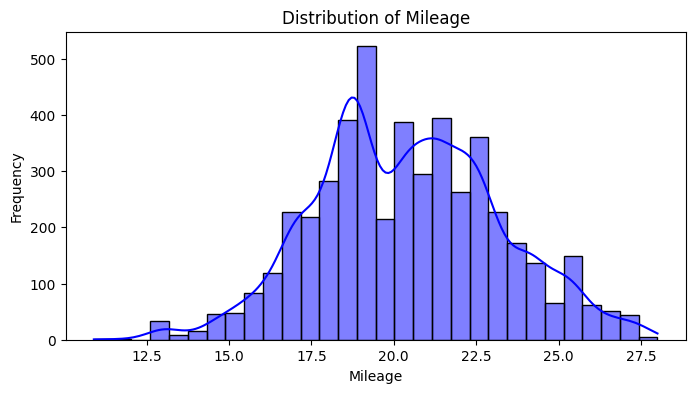

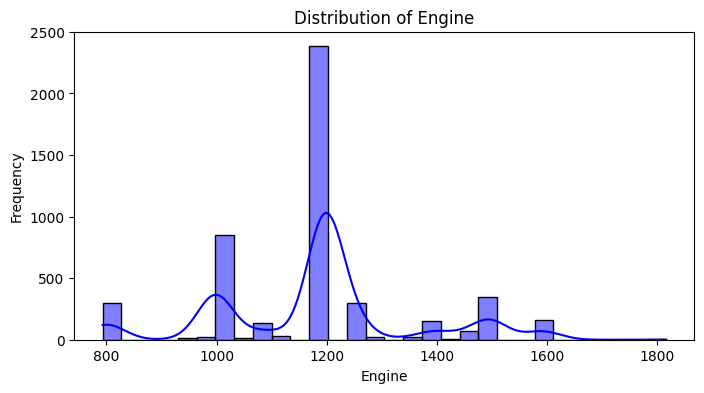

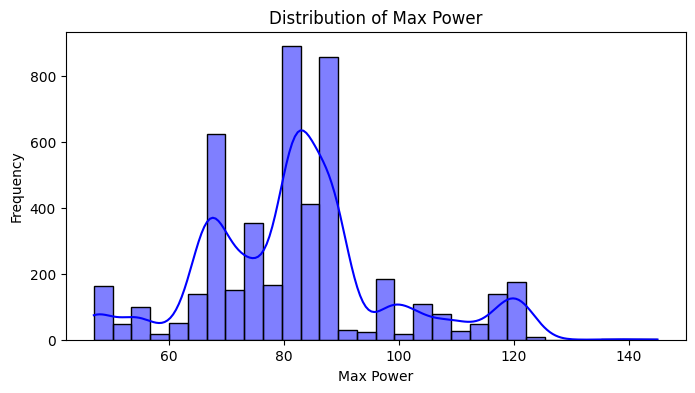

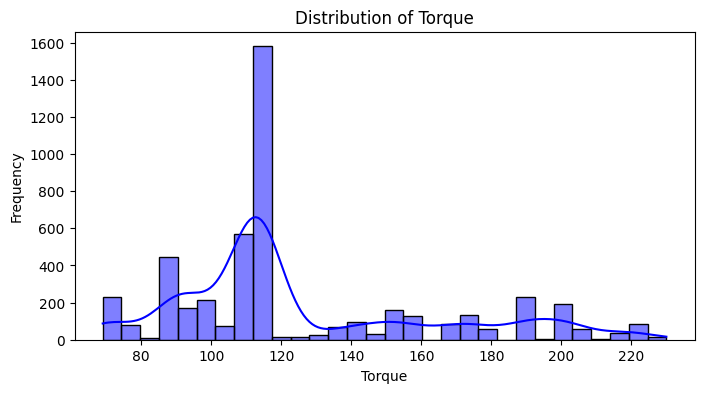

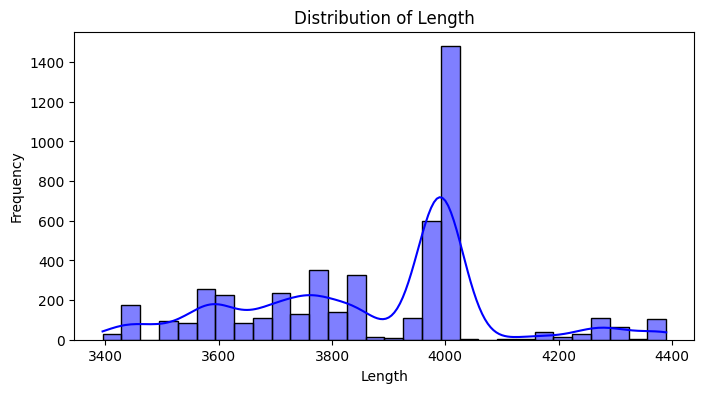

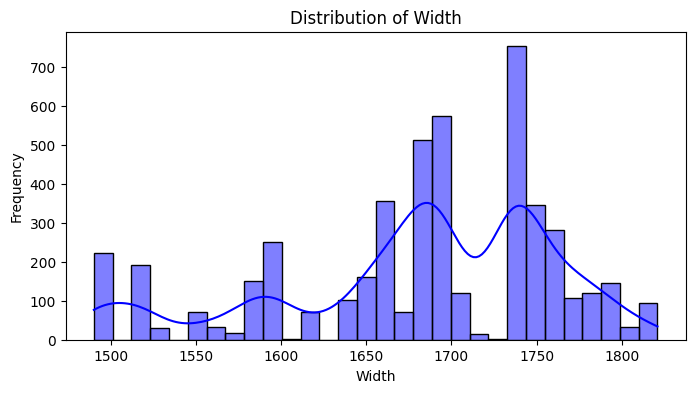

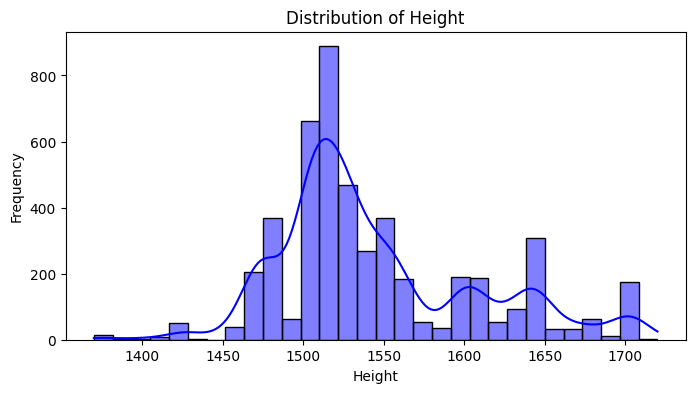

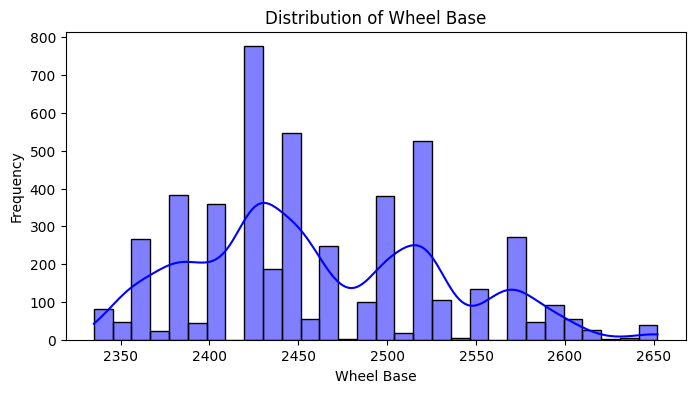

In [87]:
for feature in cont:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

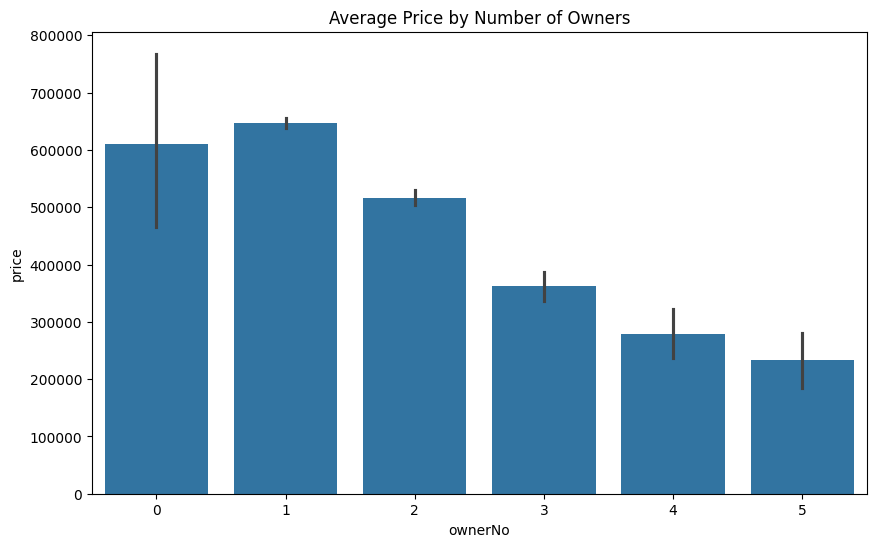

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(x='ownerNo', y='price', data=df)
plt.title('Average Price by Number of Owners')
plt.show()

In [88]:
#correlation
corr_matrix =df[cont].corr()
corr_matrix

,km,price,Mileage,Engine,Max Power,Torque,Length,Width,Height,Wheel Base
km,1.000000,-0.381650,0.096290,0.204488,-0.065432,0.244897,0.064123,-0.025874,-0.064652,-0.045392
price,-0.381650,1.000000,-0.187011,0.270631,0.630269,0.385628,0.551645,0.656871,0.349456,0.636386
Mileage,0.096290,-0.187011,1.000000,-0.287455,-0.454828,0.090322,-0.354064,-0.237528,-0.092718,-0.305041
Engine,0.204488,0.270631,-0.287455,1.000000,0.677729,0.621349,0.683776,0.603907,0.162375,0.527881
Max Power,-0.065432,0.630269,-0.454828,0.677729,1.000000,0.583372,0.727756,0.741314,0.331567,0.650799
Torque,0.244897,0.385628,0.090322,0.621349,0.583372,1.000000,0.562838,0.587913,0.234669,0.479839
Length,0.064123,0.551645,-0.354064,0.683776,0.727756,0.562838,1.000000,0.786520,0.088582,0.811180
Width,-0.025874,0.656871,-0.237528,0.603907,0.741314,0.587913,0.786520,1.000000,0.222888,0.738536
Height,-0.064652,0.349456,-0.092718,0.162375,0.331567,0.234669,0.088582,0.222888,1.000000,0.176535
Wheel Base,-0.045392,0.636386,-0.305041,0.527881,0.650799,0.479839,0.811180,0.738536,0.176535,1.000000


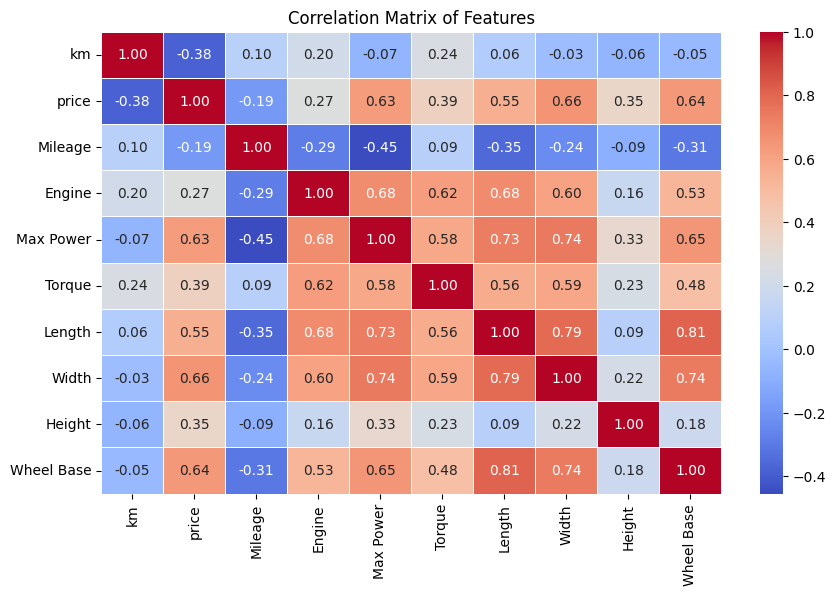

In [89]:
#coolwarm chart
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# if it is equal to zero, no relationship, if it is near to -1 then strong negative relationship and if it is near to 1 then it has strong positive relationship
#km - it has least linear relationship with other columns 
#milege - this column has good linear relationship with other columns, has strong negative relationship with engine,max power,length, wheel base
#engine - this column has strong linear relationship with other columns except km, it has very strong +ve relationship with length and width column
#max power - it has very strong positive corr between length,width, wheelbase
#torque - it has very strong +ve corr between max_power, length,width, wheelbase
#like that length, width,height column is also have strng relationship with other columns except km col
#price has positive relationship with Max Power, Length, Width and Wheel base which is surprising. I had assumptions that mileage will be having some strong relationship

In [90]:
#Machine Learning starts here
X = df.drop("price",axis=1) # features
y = df["price"] #target

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

In [93]:
#standardize the data values into a standard format.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

X_test_scaled = scaler.transform(X_test)

In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score # for evaluate the  model accuracy

 LinearRegression

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8315671374.173829
67177.38087135063
0.8622254675091536


RandomForestRegressor

In [96]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4062823540.384385
46291.90109745867
0.9326869005901672


DecisionTreeRegressor

In [97]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Decision Tree Regressor
dt_model = DecisionTreeRegressor().fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

# Print evaluation metrics for Decision Tree Regressor
#print("DecisionTreeRegressor")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))


MSE: 8992936686.431087
MAE: 67414.47668393783
R²: 0.8510044959760186


GradientBoostingRegressor

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor().fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

# Print evaluation metrics for Gradient Boosting Regressor
#print("\nGradientBoostingRegressor")
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


MSE: 4238398527.737392
MAE: 47799.722657393584
R²: 0.9297779638716271


In [158]:
!pip install xgboost

In [99]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

4098005250.773159
45088.38348850389
0.9321040079429066


In [100]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8315671374.173829
67177.38087135063
0.8622254675091536


HERE WE ARE CHECKING WHICH REGRESSOR IS BEST SUIT FOR MODEL

In [101]:
#Hypertuning LinearRegression hypertuning with its parameter
from sklearn.model_selection import GridSearchCV

param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [94]:
best_model

LinearRegression()

here we have linearregression as best suit model because r2 value is accuracy and low we should not take value more or equal to 90

In [102]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8315671374.173829
67177.38087135063
0.8622254675091536


In [103]:
X.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear',
       'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'No of Cylinder',
       'Values per Cylinder', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'City'],
      dtype='object')

In [104]:
X.shape

(4824, 30)

In [105]:
coefficients = model.coef_.flatten()  # Ensure it's 1D

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort features by the absolute value of the coefficients
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importance DataFrame
feature_importance_df


,Feature,Coefficient,Absolute Coefficient
5,modelYear,107597.777084,107597.777084
13,Max Power,49220.113254,49220.113254
22,Wheel Base,47277.339158,47277.339158
12,Engine,-41765.322607,41765.322607
29,City,-37402.414056,37402.414056
14,Torque,30084.858758,30084.858758
0,bt,25528.151825,25528.151825
1,km,-25158.237857,25158.237857
21,Height,23749.575472,23749.575472
2,transmission,-23400.515922,23400.515922


In [106]:
X_train

,bt,km,transmission,ownerNo,oem,modelYear,Insurance Validity,Fuel Type,Seats,RTO,...,Width,Height,Wheel Base,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,City
6193,0,30000,1,1,11,2019,2,3,1,21,...,1745.0,1510.0,2520.0,5,3,0,1,1,5,4
6622,0,86719,1,1,7,2009,1,3,1,21,...,1595.0,1550.0,2380.0,5,3,0,1,1,5,4
1756,0,57000,1,1,11,2020,0,3,1,25,...,1735.0,1530.0,2450.0,5,1,0,1,1,5,1
4289,0,32192,1,1,11,2015,2,3,1,6,...,1490.0,1520.0,2380.0,5,3,0,1,1,5,2
4761,4,40000,1,1,11,2022,2,3,1,26,...,1735.0,1515.0,2450.0,5,1,0,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,3,17284,1,1,6,2022,1,3,1,21,...,1734.0,1601.0,2555.0,5,1,0,1,1,5,4
8362,0,70000,1,1,19,2015,2,3,1,29,...,1682.0,1469.0,2469.0,5,3,0,1,1,5,5
2859,0,40000,1,1,7,2020,0,3,1,24,...,1680.0,1520.0,2450.0,5,1,0,1,1,5,1
5750,3,70226,1,1,6,2021,0,3,1,26,...,1734.0,1601.0,2555.0,5,1,0,1,1,5,3


In [107]:
X_train.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear',
       'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'No of Cylinder',
       'Values per Cylinder', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'City'],
      dtype='object')

In [108]:
for i in X_train:
    print(i)

bt
km
transmission
ownerNo
oem
modelYear
Insurance Validity
Fuel Type
Seats
RTO
Features
Mileage
Engine
Max Power
Torque
Color
No of Cylinder
Values per Cylinder
Turbo Charger
Length
Width
Height
Wheel Base
Gear Box
Steering Type
Front Brake Type
Rear Brake Type
Tyre Type
No Door Numbers
City


In [109]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Convert to DataFrame for better visualization
X_train_df = pd.DataFrame(X_train, columns=[i for i in X_train])

# Initialize and train the LinearRegression model
# model = LinearRegression()
# model.fit(X_train, y_train)

coefficients = model.coef_.flatten()  # Ensure it's 1D

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort features by the absolute value of the coefficients
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importance DataFrame
feature_importance_df


,Feature,Coefficient,Absolute Coefficient
5,modelYear,107597.777084,107597.777084
13,Max Power,49220.113254,49220.113254
22,Wheel Base,47277.339158,47277.339158
12,Engine,-41765.322607,41765.322607
29,City,-37402.414056,37402.414056
14,Torque,30084.858758,30084.858758
0,bt,25528.151825,25528.151825
1,km,-25158.237857,25158.237857
21,Height,23749.575472,23749.575472
2,transmission,-23400.515922,23400.515922


In [ ]:
# values closer to zero have very less impact in this linear regression model. we can consider removing those columns
# before removing I should place a checkpoint csv
# columns decided to be dropped are "Turbo Charger, Color, Insurance Validity, Gear Box, RTO, Features"
 #Turbo Charger    -372.274557
 #Color     -88.705461
# Insurance Validity     -34.352860
# Gear Box    -170.043617
# RTO    -921.733798
#Features    -930.282572

In [110]:
X.to_csv("feature.csv")
y.to_csv("target.csv")

In [111]:
import pandas as pd

In [112]:
X = pd.read_csv("feature.csv")
y = pd.read_csv("target.csv")

In [113]:
X

,Unnamed: 0,bt,km,transmission,ownerNo,oem,modelYear,Insurance Validity,Fuel Type,Seats,...,Width,Height,Wheel Base,Gear Box,Steering Type,Front Brake Type,Rear Brake Type,Tyre Type,No Door Numbers,City
0,0,0,120000,1,3,11,2015,2,3,1,...,1635.0,1565.0,2425.0,5,3,0,1,1,5,0
1,1,3,32706,1,2,4,2018,0,3,1,...,1765.0,1647.0,2519.0,5,3,0,1,1,4,0
2,2,0,11949,1,1,17,2018,0,3,1,...,1647.0,1535.0,2400.0,5,3,0,1,1,5,0
3,3,4,17794,1,1,7,2014,0,3,1,...,1660.0,1520.0,2425.0,5,3,0,1,1,4,0
4,4,3,60000,1,1,11,2015,2,1,1,...,1785.0,1595.0,2600.0,5,3,0,0,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,8359,4,60000,1,1,11,2010,2,3,1,...,1690.0,1530.0,2390.0,5,3,0,1,1,4,5
4820,8362,0,70000,1,1,19,2015,2,3,1,...,1682.0,1469.0,2469.0,5,3,0,1,1,5,5
4821,8364,0,10000,1,1,11,2022,2,3,1,...,1655.0,1555.0,2435.0,5,1,0,1,1,5,5
4822,8365,0,120000,1,1,11,2014,2,3,1,...,1490.0,1475.0,2360.0,5,3,0,1,1,5,5


In [114]:
X.drop('Unnamed: 0',axis=1,inplace=True)
y.drop('Unnamed: 0',axis=1,inplace=True)

In [115]:
X.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear',
       'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Features',
       'Mileage', 'Engine', 'Max Power', 'Torque', 'Color', 'No of Cylinder',
       'Values per Cylinder', 'Turbo Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Gear Box', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'No Door Numbers', 'City'],
      dtype='object')

In [116]:
X.drop(["Turbo Charger",'Steering Type', 'Front Brake Type',
       'Rear Brake Type','Tyre Type', "RTO", "Features"], axis=1, inplace=True)

In [117]:
X.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear',
       'Insurance Validity', 'Fuel Type', 'Seats', 'Mileage', 'Engine',
       'Max Power', 'Torque', 'Color', 'No of Cylinder', 'Values per Cylinder',
       'Length', 'Width', 'Height', 'Wheel Base', 'Gear Box',
       'No Door Numbers', 'City'],
      dtype='object')

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler1 = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler1.fit_transform(X_train)

# Save the scaler to a file
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler1, f)

# Transform the test data
X_test_scaled = scaler1.transform(X_test)

# Optional: If you want to convert scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [120]:
# again the X and y split will be occured with the same linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8314108373.768242
67987.90117462337
0.8624853409505845


# this algo is giving 85% accuracy after removing the unwanted columns using the coefficient importance

In [121]:
encoders

{'bt': LabelEncoder(),
 'transmission': LabelEncoder(),
 'oem': LabelEncoder(),
 'Insurance Validity': LabelEncoder(),
 'Fuel Type': LabelEncoder(),
 'Seats': LabelEncoder(),
 'RTO': LabelEncoder(),
 'Color': LabelEncoder(),
 'Turbo Charger': LabelEncoder(),
 'Steering Type': LabelEncoder(),
 'Front Brake Type': LabelEncoder(),
 'Rear Brake Type': LabelEncoder(),
 'Tyre Type': LabelEncoder(),
 'City': LabelEncoder()}

In [123]:
# Create a single LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the 'ownerNo' column
encoder.fit(df['ownerNo'])


LabelEncoder()

In [137]:
encoders['ownerNo'] = encoder
encoders.keys()

dict_keys(['bt', 'transmission', 'oem', 'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Color', 'Turbo Charger', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'City', 'ownerNo'])

In [135]:
encoder.classes_

array([0, 1, 2, 3, 4, 5])

In [136]:
type(encoders)

dict

In [134]:
encoders.keys()

dict_keys(['bt', 'transmission', 'oem', 'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Color', 'Turbo Charger', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'City'])

In [125]:
X['No Door Numbers'].min(),X['No Door Numbers'].max(),X['No Door Numbers'].mean()

(np.int64(4), np.int64(5), np.float64(4.802238805970149))

In [126]:
X.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear',
       'Insurance Validity', 'Fuel Type', 'Seats', 'Mileage', 'Engine',
       'Max Power', 'Torque', 'Color', 'No of Cylinder', 'Values per Cylinder',
       'Length', 'Width', 'Height', 'Wheel Base', 'Gear Box',
       'No Door Numbers', 'City'],
      dtype='object')

In [127]:
X["Values per Cylinder"]

0       4
1       4
2       4
3       4
4       4
       ..
4819    4
4820    4
4821    4
4822    4
4823    4
Name: Values per Cylinder, Length: 4824, dtype: int64

In [120]:
X["No of Cylinder"]

0       3
1       3
2       3
3       4
4       4
       ..
5630    4
5631    3
5632    3
5633    4
5634    4
Name: No of Cylinder, Length: 5635, dtype: int64

In [121]:
X['Seats'].min(),X['Seats'].max()

(np.int64(0), np.int64(4))

In [122]:
X['No of Cylinder'].min(),X['No of Cylinder'].max(),X['No of Cylinder'].mean()

(np.int64(2), np.int64(4), np.float64(3.760958296362023))

In [123]:
X['Values per Cylinder'].mean(),X['Values per Cylinder'].min(),X['Values per Cylinder'].max()

(np.float64(3.934516415261757), np.int64(2), np.int64(5))

In [124]:
y = df['City'].values  # .values returns a 1D array
y

array([0, 0, 0, ..., 5, 5, 5])

In [125]:
X['Engine'].min()

np.int64(793)

In [126]:
X['Engine']

0        998
1       1497
2       1199
3       1197
4       1248
        ... 
5630    1497
5631    1199
5632     998
5633    1197
5634    1461
Name: Engine, Length: 5635, dtype: int64

In [127]:
X.shape

(5635, 24)

In [128]:
pickle.dump(model,open("carprice.pkl",'wb'))

In [129]:
X.drop(columns="Engine",inplace=True)

In [234]:
X.columns

Index(['bt', 'km', 'transmission', 'ownerNo', 'oem', 'modelYear',
       'Insurance Validity', 'Fuel Type', 'Seats', 'Mileage', 'Max Power',
       'Torque', 'Color', 'No of Cylinder', 'Values per Cylinder', 'Length',
       'Width', 'Height', 'Wheel Base', 'Gear Box', 'No Door Numbers', 'City'],
      dtype='object')

In [235]:
X.shape

(4824, 22)

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler1 = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler1.fit_transform(X_train)

# Save the scaler to a file
with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler1, f)

# Transform the test data
X_test_scaled = scaler1.transform(X_test)

# Optional: If you want to convert scaled data back to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [237]:
# again the X and y split will be occured with the same linear regression model
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train_scaled,y_train)
y_pred=model.predict(X_test_scaled)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8979430639.68828
70389.30574135258
0.8514809661646312


In [238]:
X.shape

(4824, 22)

In [132]:
encoders.keys()

dict_keys(['bt', 'transmission', 'oem', 'Insurance Validity', 'Fuel Type', 'Seats', 'RTO', 'Color', 'Turbo Charger', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'City'])

In [239]:
pickle.dump(model,open("carprice.pkl",'wb'))

In [233]:
encoders['Color'].classes_

array(['black', 'blue', 'brown', 'gold', 'gray', 'green', 'maroon',
       'orange', 'others', 'purple', 'red', 'silver', 'white', 'yellow'],
      dtype=object)